In [6]:
import pandas as pd
import numpy as np
data = pd.read_csv("C:/Users/user/Desktop/hello_ds/titanic3.csv")

#### To remove empty cells


In [7]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

#### Visualize some of the coloumns

c:\Users\user\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\user\miniconda3\envs\myenv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

<Axes: xlabel='survived', ylabel='fare'>

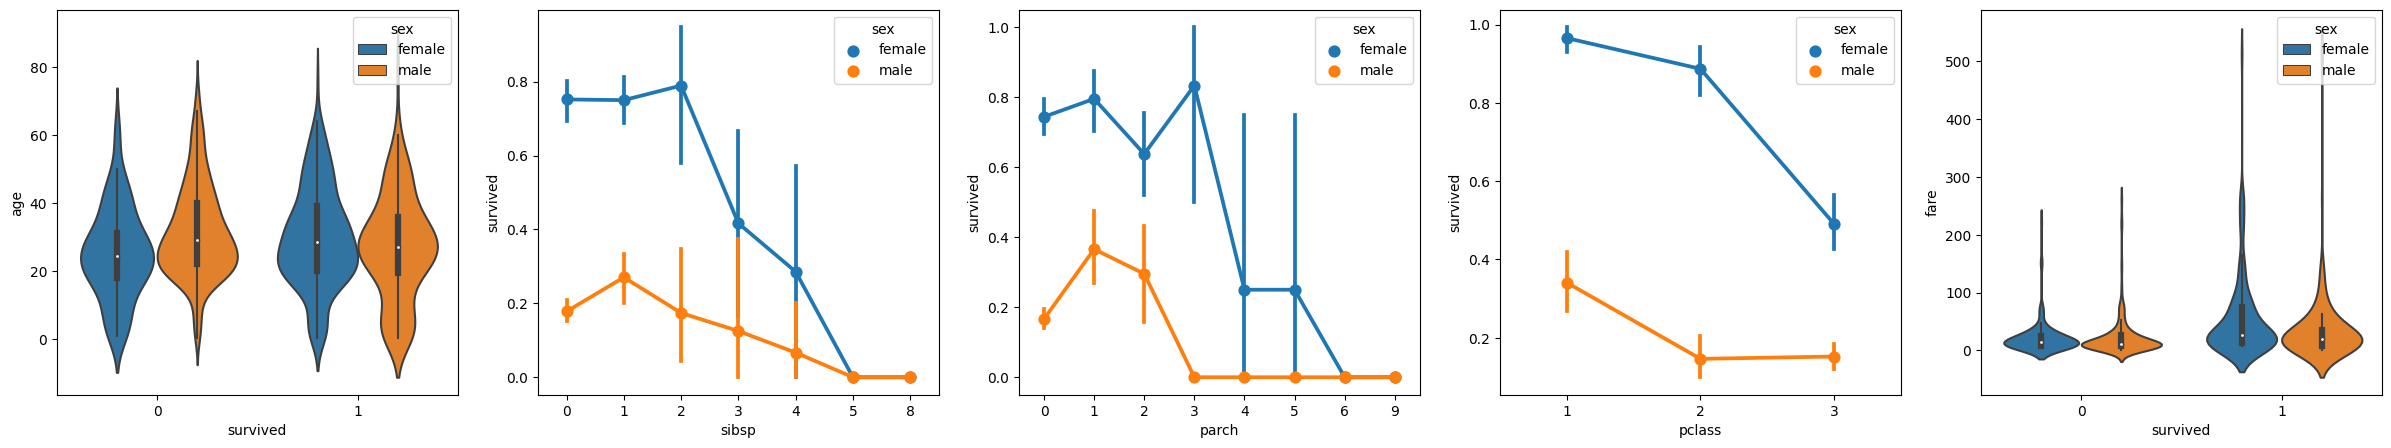

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

##### These graphs are helpful in seeing some of the relationships between survival and the input variables of the data, but it's also possible to use pandas to calculate correlations. To do so, all the variables used need to be numeric for the correlation calculation and currently gender is stored as a string. To convert those string values to integers, add and run the following code.

In [10]:
data.replace({'male': 1, 'female': 0}, inplace=True)

##### Now, you can analyze the correlation between all the input variables to identify the features that would be the best inputs to a machine learning model. The closer a value is to 1, the higher the correlation between the value and the result. Use the following code to correlate the relationship between all variables and survival.

In [ ]:
data.corr().abs()[["survived"]]

In [14]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

KeyError: 'sibsp'

In [13]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

## Train and Evaluate the Model

#### Start with splitting the data into training and validation data

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

##### normalize the inputs such that all features are treated equally. For example, within the dataset the values for age range from ~0-100, while gender is only a 1 or 0. By normalizing all the variables, you can ensure that the ranges of values are all the same. Use the following code in a new code cell to scale the input values.

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

##### There are many different machine learning algorithms that you could choose from to model the data. The scikit-learn library also provides support for many of them and a chart to help select the one that's right for your scenario. For now, use the Naïve Bayes algorithm, a common algorithm for classification problems. Add a cell with the following code to create and train the algorithm.

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

##### Test the trained Model using the test data

In [18]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


### Neural Network

In [19]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

### Add layers of the neural network

In [21]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 112 (448.00 Byte)
Trainable params: 112 (4

##### Once the model is created, it needs to be compiled. As part of this, you need to define what type of optimizer will be used, how loss will be calculated, and what metric should be optimized for. Add the following code to build and train the model.

In [22]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.5526
Epoch 2/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6908 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6863 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6852 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6840 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6819 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 2ms/step - loss: 0.6808 - accuracy: 0.5861
Epoch 11/50
27/27 [

#### Test the trained model on the test data

In [23]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 1ms/step
0.8038277511961722
